In [9]:
import full_model
import fast_model_improved
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from joblib import Parallel, delayed

## This note book aims to discover some properties of deinfluencers in restricted setting

In [10]:
# Generate the graph
# G = nx.erdos_renyi_graph(100, 0.1, directed=True)
# G = nx.watts_strogatz_graph(100, 4, 0.1).to_directed()
G = nx.barabasi_albert_graph(500, 2).to_directed()

# Initialize the InfluenceDeinfluenceModel
model = fast_model_improved.InfluenceDeinfluenceModel(G,"fixed")

# number of influencers
k = 5

# number of steps
steps = 3
influencers = model.greedy_hill_climbing(k, steps)

model.reset_graph()
#model.set_initial_states()

print("Influencers:", influencers)

Influencers: {0, 1, 225, 178, 373}


Validate that the code works as intended. Should only be used to when step = 1 and number of influencer = 2.

In [11]:
influencers = list(influencers)
node1 = influencers[0]
node2 = influencers[1]

model.set_influencers(influencers)
model.run_cascade(steps)
k = model.evaluate_influence()
print(k)
print(G.out_degree(node1))
print(G.out_degree(node2))

node_x_out_neighbors = set(G.successors(node1))
node_y_out_neighbors = set(G.successors(node2))
print("Node y out-neighbors:", list(node_y_out_neighbors))

common_out_neighbors = node_x_out_neighbors & node_y_out_neighbors
print("Common out-neighbors:", list(common_out_neighbors))

# Corrected condition
if k - (G.out_degree(node1) + G.out_degree(node2) + 2 - len(common_out_neighbors)) == 0:
    print("yes")
else:
    print("no")

model.reset_graph()

500
46
47
Node y out-neighbors: [0, 3, 4, 6, 7, 263, 9, 11, 16, 21, 22, 278, 280, 26, 27, 154, 155, 412, 417, 37, 38, 295, 40, 168, 42, 43, 176, 435, 54, 314, 187, 321, 66, 67, 72, 336, 209, 468, 88, 346, 91, 94, 222, 489, 365, 118, 127]
Common out-neighbors: [3, 4, 37, 9, 27]
no


# Examine how the change in constant c influence final inf/deinf

In [12]:
# Generate the graph
# G = nx.erdos_renyi_graph(100, 0.1, directed=True)
# G = nx.watts_strogatz_graph(100, 4, 0.1).to_directed()
G = nx.barabasi_albert_graph(300, 3).to_directed()

# Initialize the InfluenceDeinfluenceModel
model = fast_model_improved.InfluenceDeinfluenceModel(G,"fixed")

# number of influencers
k = 10

# number of steps
steps = 4
influencers = model.greedy_hill_climbing(k, steps)


model.reset_graph()
#model.set_initial_states()

print("Influencers:", influencers)

Influencers: {167, 268, 13, 78, 17, 145, 19, 148, 214, 88}


In [15]:
steps = 5

ls = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]    

G = nx.barabasi_albert_graph(300, 3).to_directed()
model = fast_model_improved.InfluenceDeinfluenceModel(G, 'dominate', c=1)
model.selected_influencers = model.random_influencers(10)
model.selected_deinfluencers = model.random_deinfluencers(5)

print("Selected influencers:", model.selected_influencers)
print("Selected deinfluencers:", model.selected_deinfluencers)

model.set_influencers(model.selected_influencers)
model.set_deinfluencers(model.selected_deinfluencers)

model.run_cascade(steps)

k = model.evaluate_influence()
j = model.evaluate_deinfluence()
print("Initial run - Influence:", k, "Deinfluence:", j)
print("_____")


for i in range(len(ls)):
    model_f = fast_model_improved.InfluenceDeinfluenceModel(G, 'dominate', c=ls[i])
    model_f.reset_graph()
    model_f.set_influencers(model.selected_influencers)
    model_f.set_deinfluencers(model.selected_deinfluencers)

    model_f.run_cascade(steps)
    k = model_f.evaluate_influence()
    j = model_f.evaluate_deinfluence()
    f= model_f.evaluate_susceptible()
    print("For c =", ls[i], "- Influence:", k, "Deinfluence:", j, "Susceptable:", f)

Selected influencers: {3, 70, 167, 186, 110, 222, 89, 122, 93, 126}
Selected deinfluencers: {140, 26, 28, 158, 95}
Initial run - Influence: 0 Deinfluence: 299
_____
For c = 0.1 - Influence: 262 Deinfluence: 33 Susceptable: 5
For c = 0.2 - Influence: 191 Deinfluence: 102 Susceptable: 7
For c = 0.3 - Influence: 89 Deinfluence: 201 Susceptable: 10
For c = 0.4 - Influence: 81 Deinfluence: 207 Susceptable: 12
For c = 0.5 - Influence: 46 Deinfluence: 246 Susceptable: 8
For c = 0.6 - Influence: 17 Deinfluence: 277 Susceptable: 6
For c = 0.7 - Influence: 13 Deinfluence: 282 Susceptable: 5
For c = 0.8 - Influence: 14 Deinfluence: 282 Susceptable: 4
For c = 0.9 - Influence: 1 Deinfluence: 292 Susceptable: 7
For c = 1 - Influence: 1 Deinfluence: 293 Susceptable: 6
For c = 1.1 - Influence: 1 Deinfluence: 296 Susceptable: 3
For c = 1.2 - Influence: 2 Deinfluence: 295 Susceptable: 3
For c = 1.3 - Influence: 0 Deinfluence: 299 Susceptable: 1
For c = 1.4 - Influence: 0 Deinfluence: 299 Susceptable: 1


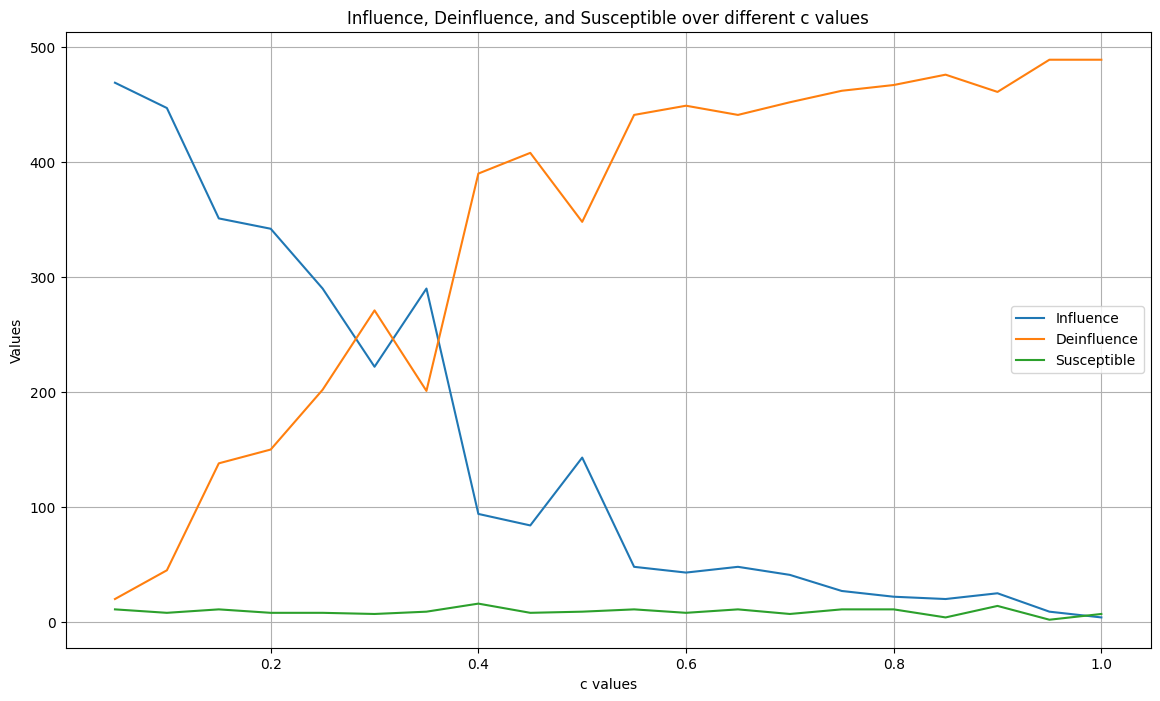

In [22]:
import networkx as nx
import fast_model_improved
import matplotlib.pyplot as plt

# Parameters
steps = 5
ls = [0.05 * i for i in range(1, 21)]

# Create the graph
G = nx.barabasi_albert_graph(500, 3).to_directed()

# Initialize the model
model = fast_model_improved.InfluenceDeinfluenceModel(G, 'dominate', c=1)
model.selected_influencers = model.random_influencers(10)
model.selected_deinfluencers = model.random_deinfluencers(5)

model.set_influencers(model.selected_influencers)
model.set_deinfluencers(model.selected_deinfluencers)
model.run_cascade(steps)

# Initial evaluation
initial_influence = model.evaluate_influence()
initial_deinfluence = model.evaluate_deinfluence()

# Results storage
influence_results = []
deinfluence_results = []
susceptible_results = []

# Iterate over different c values
for c in ls:
    model_f = fast_model_improved.InfluenceDeinfluenceModel(G, 'dominate', c=c)
    model_f.reset_graph()
    model_f.set_influencers(model.selected_influencers)
    model_f.set_deinfluencers(model.selected_deinfluencers)
    model_f.run_cascade(steps)
    
    influence_results.append(model_f.evaluate_influence())
    deinfluence_results.append(model_f.evaluate_deinfluence())
    susceptible_results.append(model_f.evaluate_susceptible())

# Plotting the results
plt.figure(figsize=(14, 8))

plt.plot(ls, influence_results, label='Influence')
plt.plot(ls, deinfluence_results, label='Deinfluence')
plt.plot(ls, susceptible_results, label='Susceptible')

plt.xlabel('c values')
plt.ylabel('Values')
plt.title('Influence, Deinfluence, and Susceptible over different c values')
plt.legend()
plt.grid(True)
plt.show()


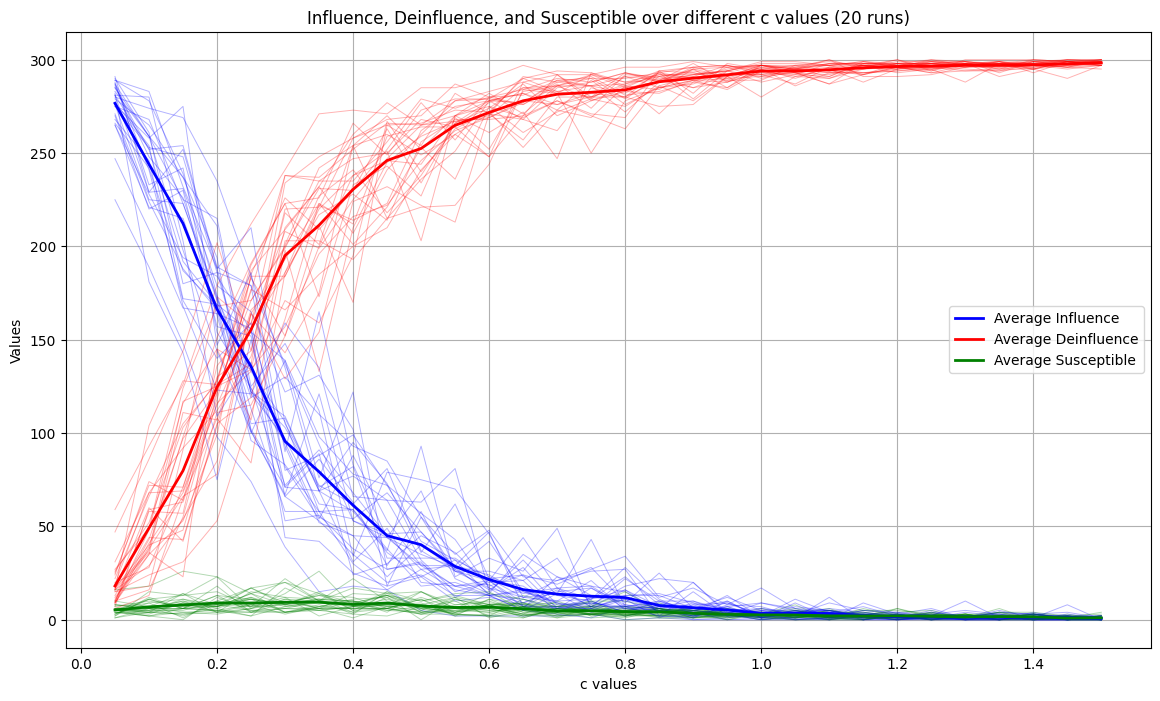

In [23]:
# Parameters
steps = 5
ls = [0.05 * i for i in range(1, 31)]
num_runs = 30

# Storage for all runs
all_influence_results = []
all_deinfluence_results = []
all_susceptible_results = []

# Placeholder for model simulation
def run_simulation(G, steps, c, influencers, deinfluencers):
    # Initialize the model
    model_f = fast_model_improved.InfluenceDeinfluenceModel(G, 'dominate', c=c)
    model_f.reset_graph()
    model_f.set_influencers(influencers)
    model_f.set_deinfluencers(deinfluencers)
    model_f.run_cascade(steps)
    
    # Evaluate the results
    influence = model_f.evaluate_influence()
    deinfluence = model_f.evaluate_deinfluence()
    susceptible = model_f.evaluate_susceptible()
    
    return influence, deinfluence, susceptible

# Run simulations
for run in range(num_runs):
    G = nx.barabasi_albert_graph(300, 3).to_directed()
    model = fast_model_improved.InfluenceDeinfluenceModel(G, 'dominate', c=1)
    influencers = model.random_influencers(10)
    deinfluencers = model.random_deinfluencers(5)
    
    model.set_influencers(influencers)
    model.set_deinfluencers(deinfluencers)
    model.run_cascade(steps)
    
    influence_results = []
    deinfluence_results = []
    susceptible_results = []
    
    for c in ls:
        influence, deinfluence, susceptible = run_simulation(G, steps, c, influencers, deinfluencers)
        influence_results.append(influence)
        deinfluence_results.append(deinfluence)
        susceptible_results.append(susceptible)
    
    all_influence_results.append(influence_results)
    all_deinfluence_results.append(deinfluence_results)
    all_susceptible_results.append(susceptible_results)

# Convert to numpy arrays for easier handling
all_influence_results = np.array(all_influence_results)
all_deinfluence_results = np.array(all_deinfluence_results)
all_susceptible_results = np.array(all_susceptible_results)

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot individual runs
for run in range(num_runs):
    plt.plot(ls, all_influence_results[run], color='blue', alpha=0.3, linewidth=0.7)
    plt.plot(ls, all_deinfluence_results[run], color='red', alpha=0.3, linewidth=0.7)
    plt.plot(ls, all_susceptible_results[run], color='green', alpha=0.3, linewidth=0.7)

# Plot average
plt.plot(ls, all_influence_results.mean(axis=0), label='Average Influence', color='blue', linewidth=2)
plt.plot(ls, all_deinfluence_results.mean(axis=0), label='Average Deinfluence', color='red', linewidth=2)
plt.plot(ls, all_susceptible_results.mean(axis=0), label='Average Susceptible', color='green', linewidth=2)

plt.xlabel('c values')
plt.ylabel('Values')
plt.title('Influence, Deinfluence, and Susceptible over different c values (20 runs)')
plt.legend()
plt.grid(True)
plt.show()


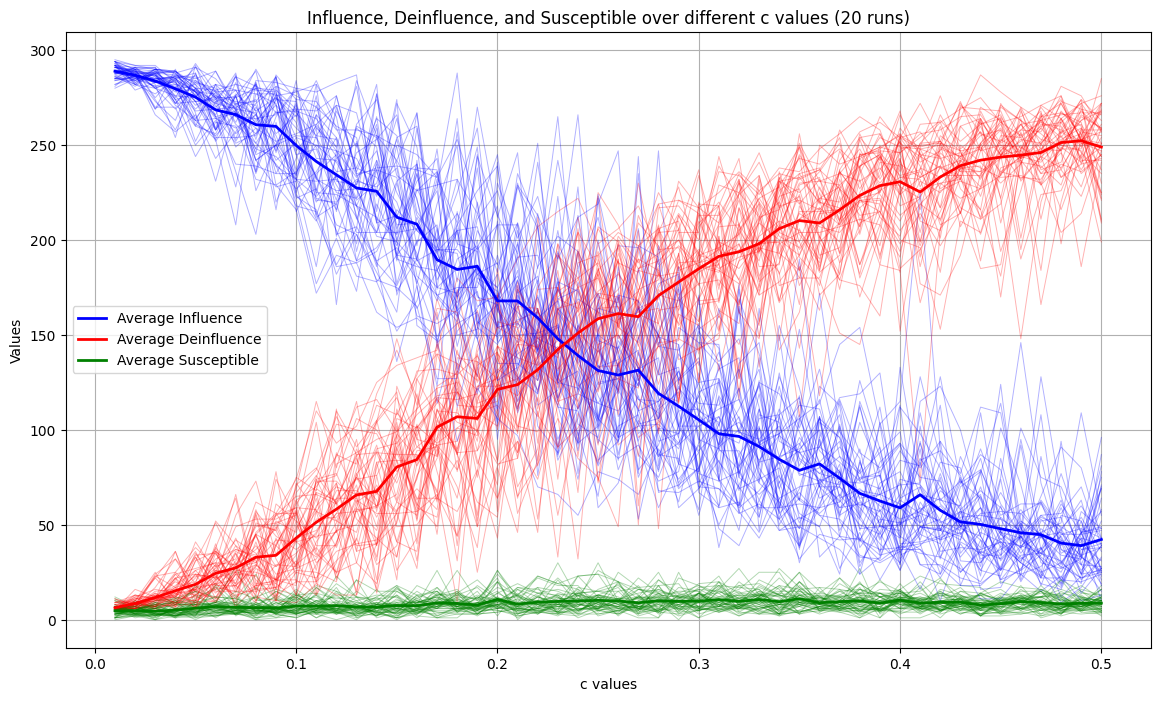

In [24]:
# Parameters
steps = 5
ls = [0.01 * i for i in range(1, 51)]
num_runs = 50

# Storage for all runs
all_influence_results = []
all_deinfluence_results = []
all_susceptible_results = []

# Placeholder for model simulation
def run_simulation(G, steps, c, influencers, deinfluencers):
    # Initialize the model
    model_f = fast_model_improved.InfluenceDeinfluenceModel(G, 'dominate', c=c)
    model_f.reset_graph()
    model_f.set_influencers(influencers)
    model_f.set_deinfluencers(deinfluencers)
    model_f.run_cascade(steps)
    
    # Evaluate the results
    influence = model_f.evaluate_influence()
    deinfluence = model_f.evaluate_deinfluence()
    susceptible = model_f.evaluate_susceptible()
    
    return influence, deinfluence, susceptible

# Run simulations
for run in range(num_runs):
    G = nx.barabasi_albert_graph(300, 3).to_directed()
    model = fast_model_improved.InfluenceDeinfluenceModel(G, 'dominate', c=1)
    influencers = model.random_influencers(10)
    deinfluencers = model.random_deinfluencers(5)
    
    model.set_influencers(influencers)
    model.set_deinfluencers(deinfluencers)
    model.run_cascade(steps)
    
    influence_results = []
    deinfluence_results = []
    susceptible_results = []
    
    for c in ls:
        influence, deinfluence, susceptible = run_simulation(G, steps, c, influencers, deinfluencers)
        influence_results.append(influence)
        deinfluence_results.append(deinfluence)
        susceptible_results.append(susceptible)
    
    all_influence_results.append(influence_results)
    all_deinfluence_results.append(deinfluence_results)
    all_susceptible_results.append(susceptible_results)

# Convert to numpy arrays for easier handling
all_influence_results = np.array(all_influence_results)
all_deinfluence_results = np.array(all_deinfluence_results)
all_susceptible_results = np.array(all_susceptible_results)

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot individual runs
for run in range(num_runs):
    plt.plot(ls, all_influence_results[run], color='blue', alpha=0.3, linewidth=0.7)
    plt.plot(ls, all_deinfluence_results[run], color='red', alpha=0.3, linewidth=0.7)
    plt.plot(ls, all_susceptible_results[run], color='green', alpha=0.3, linewidth=0.7)

# Plot average
plt.plot(ls, all_influence_results.mean(axis=0), label='Average Influence', color='blue', linewidth=2)
plt.plot(ls, all_deinfluence_results.mean(axis=0), label='Average Deinfluence', color='red', linewidth=2)
plt.plot(ls, all_susceptible_results.mean(axis=0), label='Average Susceptible', color='green', linewidth=2)

plt.xlabel('c values')
plt.ylabel('Values')
plt.title('Influence, Deinfluence, and Susceptible over different c values (20 runs)')
plt.legend()
plt.grid(True)
plt.show()
